## 构造非线性数据

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.random.uniform(-4,2,size=(100))
# 生成-4到2之间的100个均匀分布随机数
y = 2*x**2 + 4*x + 3 + np.random.randn(100)
# np.random.randn(100)生成100个符合标准正态分布的随机数模拟真实场景中数据的噪音

X = x.reshape(-1,1)
# 将一维的x数组转换成二维矩阵（形状为(100，1)）
# 在机器学习中多数模型（如线性回归）要求输入的特征数据是二维矩阵（形状为（样本数，特征数））

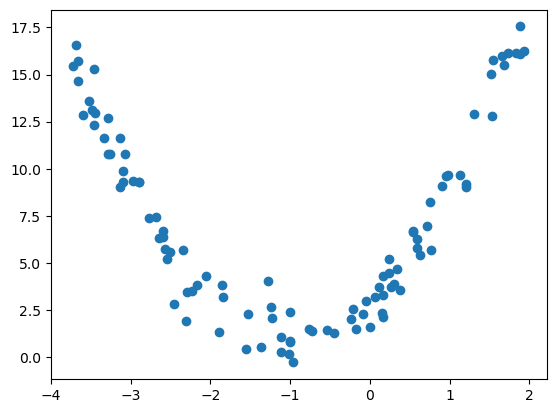

In [4]:
plt.scatter(x,y)
plt.show()

## 线性回归

In [16]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X,y)

LinearRegression()

In [18]:
y_predict = linear_regression.predict(X)

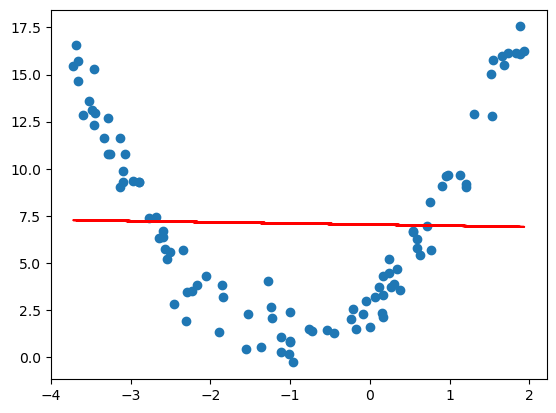

In [20]:
plt.scatter(x,y)
plt.plot(x,y_predict,color='red')
plt.show()

## 多项式回归

In [25]:
X[:5]

array([[-3.66522623],
       [-3.27802319],
       [-1.11957909],
       [ 0.15037777],
       [ 1.308986  ]])

In [37]:
X_new = np.hstack([X,X**2])
# 关键步骤

In [39]:
X_new[:5]

array([[-3.66522623, 13.43388329],
       [-3.27802319, 10.74543601],
       [-1.11957909,  1.25345735],
       [ 0.15037777,  0.02261347],
       [ 1.308986  ,  1.71344435]])

In [41]:
linear_regression_new = LinearRegression()
linear_regression_new.fit(X_new,y)

LinearRegression()

In [45]:
y_predict_new = linear_regression_new.predict(X_new)

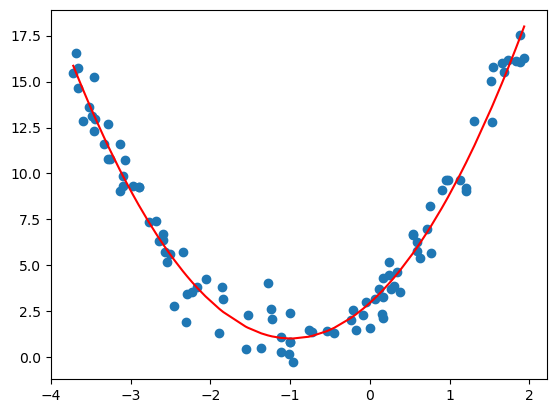

In [51]:
plt.scatter(x,y)
plt.plot(np.sort(x,axis=0),y_predict_new[np.argsort(x)],color='red')
plt.show()

In [53]:
linear_regression_new.intercept_
# 截距

2.959875216816629

In [57]:
linear_regression_new.coef_
# 分别对应x和x2的系数

array([3.929571 , 1.9894376])

## scikit-learn中的PolynomialFeatures

In [60]:
from sklearn.preprocessing import PolynomialFeatures
# 自动生成多项式特征简化多项式回归的特征构造

In [82]:
polynomial_features = PolynomialFeatures(degree = 2)
# (degree = 2):初始化，指定最高次数，对原始特征[x],会生成[1,x,x2](包含截距项1)

In [84]:
X_poly = polynomial_features.fit_transform(X)
# fit:拟合数据，学习原始特征的结构
# transform:基于拟合效果，将原始特征X转换成为包含多项式特征的新矩阵

In [86]:
X_poly[:5]

array([[ 1.        , -3.66522623, 13.43388329],
       [ 1.        , -3.27802319, 10.74543601],
       [ 1.        , -1.11957909,  1.25345735],
       [ 1.        ,  0.15037777,  0.02261347],
       [ 1.        ,  1.308986  ,  1.71344435]])

In [92]:
linear_regression_new = LinearRegression()
linear_regression_new.fit(X_poly,y)

LinearRegression()

In [94]:
y_predict_new = linear_regression_new.predict(X_poly)

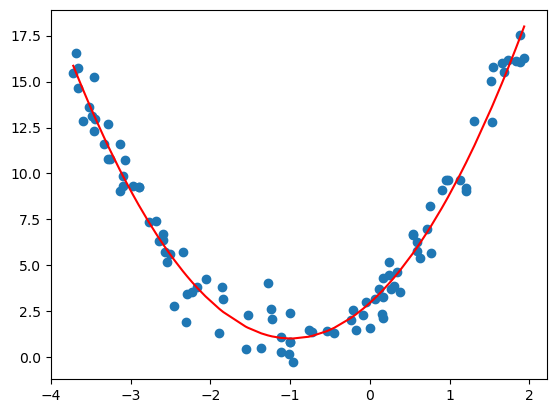

In [96]:
plt.scatter(x,y)
plt.plot(np.sort(x,axis=0),y_predict_new[np.argsort(x)],color='red')
plt.show()